<a href="https://colab.research.google.com/github/Polapob/Twitter-Prediction-Kaggle/blob/main/Twitter_nlp_modify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 65.8MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 22.7MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 141MB/s]


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

Check type information of training data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Check missing data

In [4]:
null_percentage = pd.DataFrame(train.isnull().sum()/train.shape[0]*100,columns=["Missing_value_percentage"])
null_percentage

Missing_value_percentage
id                        0.000000
keyword                   0.801261
location                 33.272035
text                      0.000000
target                    0.000000

In [5]:
null_percentage_test = pd.DataFrame(test.isnull().sum()/test.shape[0]*100,columns=["Missing_value_percentage"])
null_percentage_test

Missing_value_percentage
id                        0.000000
keyword                   0.796813
location                 33.864542
text                      0.000000



*   Keyword has missing a little bit 
*   Location has moderate missing data.



Fill missing value with this data

In [6]:
train.loc[train["keyword"].isnull() == True,"keyword"] = "No Keyword"
train.loc[train["location"].isnull() == True,"location"] = "No Location"
test.loc[test["keyword"].isnull() == True,"keyword"] = "No Keyword"
test.loc[test["location"].isnull() == True,"location"] = "No Location"

Check keywords in data

In [7]:
All_train_keyword = pd.DataFrame(train.keyword.value_counts())
All_train_keyword.reset_index()
All_train_keyword.rename(columns={"keyword":"Occurrence","index":'word'},inplace=True)

In [8]:
for i in All_train_keyword.index:
  print(i)

No Keyword
fatalities
deluge
armageddon
body%20bags
damage
harm
sinking
siren
fear
collided
outbreak
evacuate
twister
windstorm
explosion
whirlwind
wrecked
derailment
weapon
flames
collision
earthquake
sunk
weapons
wreckage
hellfire
sinkhole
famine
fire
oil%20spill
typhoon
flooding
injury
bombed
deaths
fatal
derailed
blaze
hurricane
explode
thunder
upheaval
ambulance
drowned
quarantined
destroy
curfew
sandstorm
pandemonium
ruin
hostages
wounded
emergency
panic
burning%20buildings
mudslide
fatality
blizzard
crush
police
debris
wreck
bioterror
floods
desolation
evacuation
engulfed
devastation
massacre
dust%20storm
displaced
death
refugees
ablaze
evacuated
cliff%20fall
nuclear%20reactor
catastrophe
detonate
attack
danger
screaming
tragedy
emergency%20plan
bleeding
derail
airplane%20accident
screams
suicide%20bomb
hail
injured
bridge%20collapse
inundated
hijacker
demolition
rescuers
traumatised
rescued
attacked
casualties
rioting
buildings%20burning
accident
structural%20failure
hazardous


We want to check the location and target rate

In [9]:
visualization = train.groupby(by="keyword",as_index=False).sum()

In [10]:
keyword = All_train_keyword
keyword.reset_index(inplace=True)

In [11]:
keyword.rename(columns={"index":"keyword"},inplace=True)

In [12]:
visualization = visualization.merge(keyword,on="keyword",how="left")

In [13]:
visualization

keyword      id  target  Occurrence
0             No Keyword  326326      42          61
1                 ablaze    2534      13          36
2               accident    4263      24          35
3             aftershock    5825       0          34
4    airplane%20accident    7705      30          35
..                   ...     ...     ...         ...
217              wounded  392538      26          37
218               wounds  351859      10          33
219                wreck  396215       7          37
220             wreckage  419629      39          39
221              wrecked  421617       3          39

[222 rows x 4 columns]

In [14]:
visualization["Target_percentage"] = visualization["target"]/visualization["Occurrence"]*100
visualization

keyword      id  target  Occurrence  Target_percentage
0             No Keyword  326326      42          61          68.852459
1                 ablaze    2534      13          36          36.111111
2               accident    4263      24          35          68.571429
3             aftershock    5825       0          34           0.000000
4    airplane%20accident    7705      30          35          85.714286
..                   ...     ...     ...         ...                ...
217              wounded  392538      26          37          70.270270
218               wounds  351859      10          33          30.303030
219                wreck  396215       7          37          18.918919
220             wreckage  419629      39          39         100.000000
221              wrecked  421617       3          39           7.692308

[222 rows x 5 columns]

In [15]:
visualization.sort_values(by="Target_percentage",inplace=True,ascending=False)

In [16]:
visualization

keyword      id  target  Occurrence  Target_percentage
220     wreckage  419629      39          39         100.000000
63        debris  115672      37          37         100.000000
71    derailment  137519      39          39         100.000000
154     outbreak  302788      39          40          97.500000
153  oil%20spill  285789      37          38          97.368421
..           ...     ...     ...         ...                ...
28    body%20bag   46224       1          33           3.030303
20       blazing   34048       1          34           2.941176
171         ruin  309586       1          37           2.702703
30   body%20bags   61654       1          41           2.439024
3     aftershock    5825       0          34           0.000000

[222 rows x 5 columns]

Check top 30 keyword that are real diaster

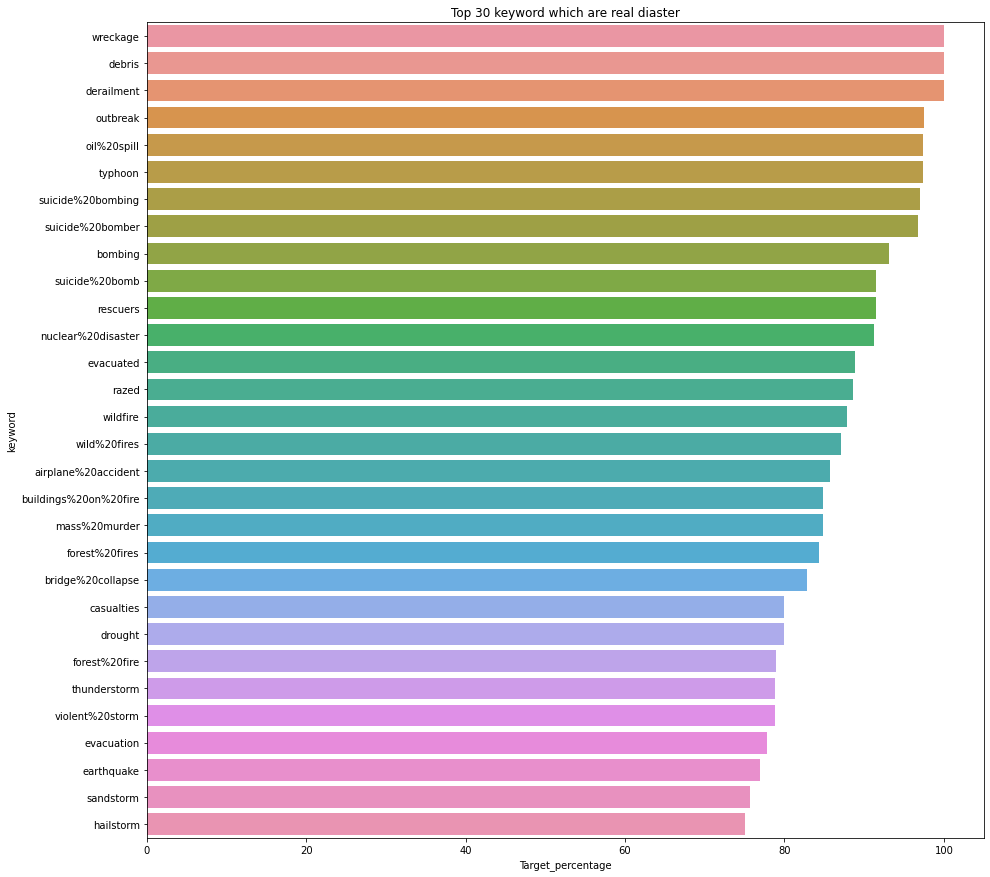

In [17]:
plt.figure(figsize=(15,15))
sns.barplot(x ="Target_percentage",y="keyword",data=visualization[:30])
plt.title("Top 30 keyword which are real diaster")
plt.show()

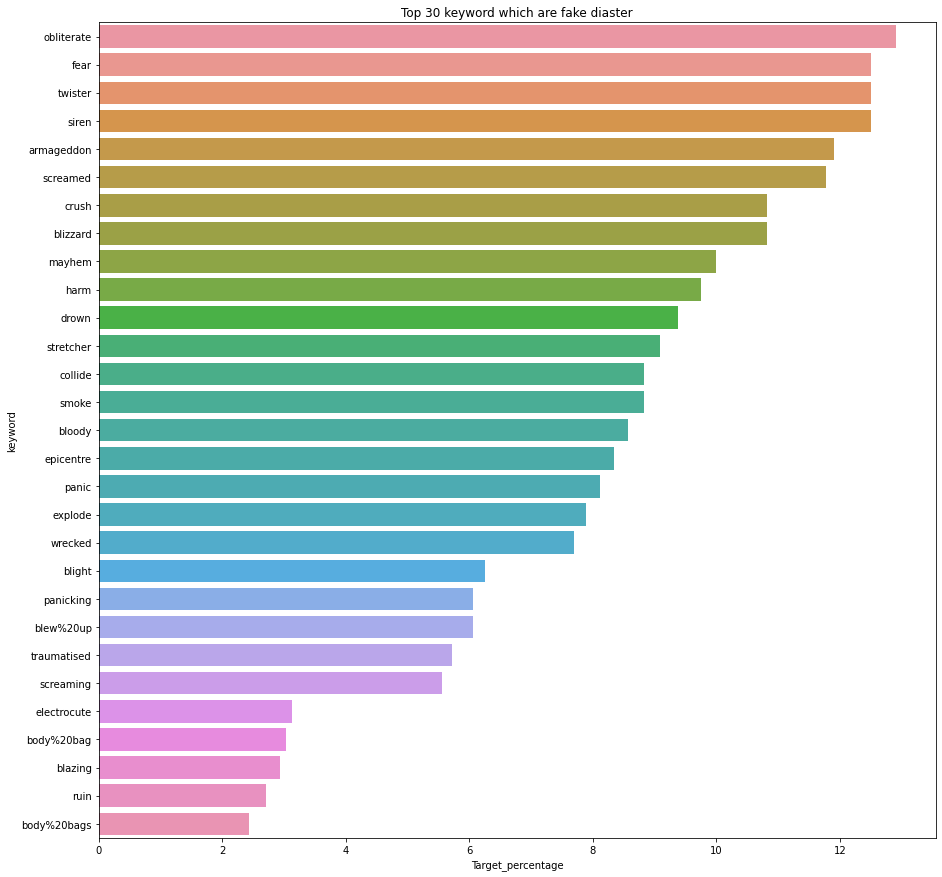

In [18]:
plt.figure(figsize=(15,15))
sns.barplot(x ="Target_percentage",y="keyword",data=visualization[-30:-1])
plt.title("Top 30 keyword which are fake diaster")
plt.show()

Interesting data with keyword, we will do something to extract features with it later.

In [19]:
train

id  ... target
0         1  ...      1
1         4  ...      1
2         5  ...      1
3         6  ...      1
4         7  ...      1
...     ...  ...    ...
7608  10869  ...      1
7609  10870  ...      1
7610  10871  ...      1
7611  10872  ...      1
7612  10873  ...      1

[7613 rows x 5 columns]

We label hashtag  by using percentage of target divide by 10 (label encoder)

In [20]:
visualization["Keyword_labeling"] = visualization["Target_percentage"]/10
visualization

keyword      id  ...  Target_percentage  Keyword_labeling
220     wreckage  419629  ...         100.000000         10.000000
63        debris  115672  ...         100.000000         10.000000
71    derailment  137519  ...         100.000000         10.000000
154     outbreak  302788  ...          97.500000          9.750000
153  oil%20spill  285789  ...          97.368421          9.736842
..           ...     ...  ...                ...               ...
28    body%20bag   46224  ...           3.030303          0.303030
20       blazing   34048  ...           2.941176          0.294118
171         ruin  309586  ...           2.702703          0.270270
30   body%20bags   61654  ...           2.439024          0.243902
3     aftershock    5825  ...           0.000000          0.000000

[222 rows x 6 columns]

In [21]:
dict1 = {}
for i in range(visualization.shape[0]):
  dict1[visualization.iloc[i,0]] = visualization.iloc[i,-1]

In [22]:
def label(x,dict_label):
  return dict_label[x]

In [23]:
train["keyword_label"] = train["keyword"].apply(lambda x:label(x,dict1))

In [24]:
train

id     keyword  ... target keyword_label
0         1  No Keyword  ...      1      6.885246
1         4  No Keyword  ...      1      6.885246
2         5  No Keyword  ...      1      6.885246
3         6  No Keyword  ...      1      6.885246
4         7  No Keyword  ...      1      6.885246
...     ...         ...  ...    ...           ...
7608  10869  No Keyword  ...      1      6.885246
7609  10870  No Keyword  ...      1      6.885246
7610  10871  No Keyword  ...      1      6.885246
7611  10872  No Keyword  ...      1      6.885246
7612  10873  No Keyword  ...      1      6.885246

[7613 rows x 6 columns]

Doing some feature engineering

In [25]:
df_train = train.copy()
df_test = test.copy()

In [26]:
punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';',  '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', '¹', '≤', '‡', '√',"'" ]

df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in punct]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in punct]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [27]:
df_train

id     keyword  ... hashtag_count mention_count
0         1  No Keyword  ...             1             0
1         4  No Keyword  ...             0             0
2         5  No Keyword  ...             0             0
3         6  No Keyword  ...             1             0
4         7  No Keyword  ...             2             0
...     ...         ...  ...           ...           ...
7608  10869  No Keyword  ...             0             0
7609  10870  No Keyword  ...             0             2
7610  10871  No Keyword  ...             0             0
7611  10872  No Keyword  ...             0             0
7612  10873  No Keyword  ...             0             0

[7613 rows x 14 columns]

In [28]:
df_test

id     keyword  ... hashtag_count mention_count
0         0  No Keyword  ...             0             0
1         2  No Keyword  ...             1             0
2         3  No Keyword  ...             0             0
3         9  No Keyword  ...             2             0
4        11  No Keyword  ...             0             0
...     ...         ...  ...           ...           ...
3258  10861  No Keyword  ...             0             0
3259  10865  No Keyword  ...             0             0
3260  10868  No Keyword  ...             0             0
3261  10874  No Keyword  ...             0             0
3262  10875  No Keyword  ...             2             0

[3263 rows x 12 columns]

Doing new feature have location

In [29]:
df_train.loc[df_train["location"]=="No Location","Have_location"] = 1
df_train.loc[df_train["location"]!="No Location","Have_location"] = 0 

df_test.loc[df_test["location"]=="No Location","Have_location"] = 1
df_test.loc[df_test["location"]!="No Location","Have_location"] = 0 

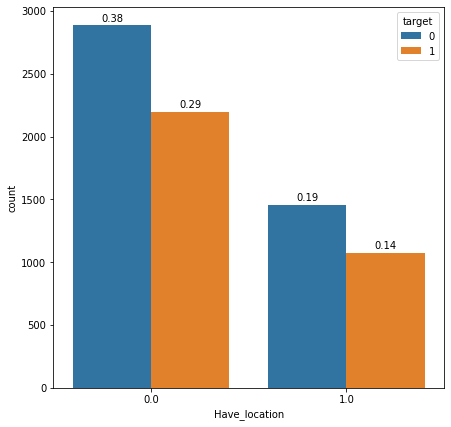

In [30]:
plt.figure(figsize=(7,7))
ax = sns.countplot(data=df_train,hue="target",x="Have_location")
total = df_train.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height+30,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

There is a few different with have and not_have location

Now we clean twitter data

First we remove url in text

In [31]:
import re
def clean_url(text):
  return re.sub(r'http\S+',"",text)
def clean_url2(text):
  return re.sub(r'https\S+',"",text)
df_train["text"] = df_train["text"].apply(lambda x : clean_url(x))
df_train["text"] = df_train["text"].apply(lambda x : clean_url2(x))
df_test["text"] = df_test["text"].apply(lambda x:clean_url(x))
df_test["text"] = df_test["text"].apply(lambda x:clean_url2(x))

In [32]:
train["text"] = train["text"].apply(lambda x:clean_url(x))
train["text"] = train["text"].apply(lambda x:clean_url2(x))

In [33]:
df_train.drop(columns="id",inplace=True)
df_test.drop(columns="id",inplace=True)

second remove account

In [34]:
def clean_tag(text):
  return re.sub(r'@\S+',"",text)
df_train["text"] = df_train["text"].apply(lambda x : clean_tag(x))
df_test["text"] = df_test["text"].apply(lambda x:clean_tag(x))
train["text"] = train["text"].apply(lambda x:clean_tag(x))

third we want to clean word in twitter text. But we doing a dictionary first to clean text.

In [35]:
vocab = {}
vocab1 = {}
for i in df_train.text.values:
  for j in i.strip().split():
    try:
      vocab[j] += 1
    except:
      vocab[j] = 1

for i in train.text.values:
  for j in i.strip().split():
    try:
      vocab1[j] += 1
    except:
      vocab1[j] = 1

In [36]:
word = [[word,occurrence] for word,occurrence in vocab.items()]
word = sorted(word,key = lambda x:x[1],reverse=True)
sort_dict = {}
for i in word:
  sort_dict[i[0]] = i[1]
 

In [37]:
word = [[word,occurrence] for word,occurrence in vocab1.items()]
word = sorted(word,key = lambda x:x[1],reverse=True)
sort_dict2 = {}
for i in word:
  sort_dict2[i[0]] = i[1]
 

fourth We use word embedding to be my cleaning vocab guide with finding oov. 
In this case we use glovetwitter27b100d.txt to be our vocab

In [38]:
!kaggle datasets download -d bertcarremans/glovetwitter27b100dtxt

glovetwitter27b100dtxt.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
!unzip glovetwitter27b100dtxt.zip

Archive:  glovetwitter27b100dtxt.zip
replace glove.twitter.27B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [40]:
def load_glove_word():    
    EMBEDDING_FILE = 'glove.twitter.27B.100d.txt'
    dict_word = {}
    infile = open(EMBEDDING_FILE,"r")
    for line in infile:
      each_word = line.strip()[:line.find(" ")]
      others = np.array(line.strip()[line.find(" "):].strip().split(),dtype=float)
      dict_word[each_word] = others
    infile.close()
    return dict_word
glove_word = load_glove_word()

In [41]:
import operator
def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in vocab.keys():
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:
            oov[word] = vocab[word]
            i += vocab[word]
            pass
    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x
OOV_Vocab_in_twitter_data = check_coverage(sort_dict,glove_word)

Found embeddings for 29.64% of vocab
Found embeddings for  59.48% of all text


We can improve a lot, there are a lot of space to add clean vocab in our twitter data.

In [42]:
def generate_vocab(dataframe):
  vocab = {}
  for i in dataframe.text.values:
    for j in i.strip().split():
      try:
        vocab[j.lower()] += 1
      except:
        vocab[j.lower()] = 1
  word = [[word,occurrence] for word,occurrence in vocab.items()]
  word = sorted(word,key = lambda x:x[1],reverse=True)
  sort_dict = {}
  for i in word:
    sort_dict[i[0]] = i[1]
  return sort_dict
vocab_new = generate_vocab(df_train)

In [43]:
print("After lowercase")
OOV_Vocab_in_twitter_data = check_coverage(vocab_new,glove_word)

After lowercase
Found embeddings for 52.24% of vocab
Found embeddings for  83.02% of all text


In [44]:
OOV_Vocab_in_twitter_data

[("i'm", 237),
 ('??', 214),
 ("it's", 176),
 ("don't", 168),
 ('...', 147),
 ('2', 145),
 ('????', 96),
 ("can't", 86),
 ('3', 81),
 ("you're", 66),
 ('5', 56),
 ('4', 55),
 ('??????', 55),
 ("that's", 51),
 ('\x89û_', 50),
 ('70', 40),
 ("i've", 40),
 ('mh370:', 39),
 ("he's", 39),
 ('1', 39),
 ('\x89ûò', 38),
 ("there's", 37),
 ("i'll", 34),
 ("'the", 32),
 ('40', 32),
 ('latest:', 31),
 ("legionnaires'", 31),
 ('15', 31),
 ('2015', 31),
 ('#prebreak', 30),
 ('bioterror', 29),
 ('16yr', 28),
 ('video:', 28),
 ('6', 27),
 ('re\x89û_', 27),
 ('a...', 27),
 ('w/', 26),
 ('8', 26),
 ("i'd", 26),
 ('\x89ûó', 26),
 ("confirmed'", 25),
 ("'conclusively", 25),
 ('legionnaires:', 25),
 ('typhoon-devastated', 25),
 ("doesn't", 25),
 ("what's", 25),
 ('crash:', 24),
 ('pm:', 24),
 ("didn't", 24),
 ('#???', 23),
 ('saipan:', 22),
 ('fire.', 22),
 ('11-year-old', 21),
 ('derailment:', 21),
 ('#hiroshima', 21),
 ('.:', 21),
 ("we're", 21),
 ('30', 21),
 ('were...', 20),
 ('(detonation)', 20),
 ('

Next we clean our text by using dict_correction

In [45]:
dict_correction = {"it's":"it is","don't":"do not","can't":"cannot","you're":"you are",
                   "that's":"that is","i've":"i have","he's":"he is","there's":"there is","doesn't":"does not",
                   "what's":"what is","didn't":"did not","disea...":"disease","we're":"we are","let's":"let us",
                   "isn't":"is not","she's":"she is","reddit's":"reddit","ain't":"am not",
                   "won't":"will not","wasn't":"was not","hasn't":"has not","aren't":"are not",
                   "you'll":"you will","'it's	":"it is","shouldn't":"should not",":(":"sad",
                   ":p":"frustration","'i'm":"i am","we've":"we have","you've":"you have",
                   ":d":"very happy","wouldn't":"would not","y'all":"you all",":-)":"happy",
                   "they'll":"they will","weren't":"were not","they've":"they have","triple-digit":"triple digit",
                   "it'll":"it will","couldn't":"could not","red-light":"red light",
                   "you'd":"you would","they'd":"they would","we'd":"we would","3:":"smile",
                   ";-;":"cry","harm/kid":"harm kid","i'm":"i am","i'll":"i will","i'd":"i would",
                   "donªt":"do not","youªve":"you have"
                   }


In [46]:
def clean_text(text):
  str_word = str(text.lower())
  for k in dict_correction:
    str_word = str_word.replace(k,dict_correction[k])
  return str_word
df_train["text"] = df_train["text"].apply(lambda x: clean_text(x))
df_test["text"] =df_test["text"].apply(lambda x:clean_text(x))

In [47]:
vocab_after_clean = generate_vocab(df_train)
OOV_Vocab_in_twitter_data = check_coverage(vocab_after_clean,glove_word)

Found embeddings for 52.40% of vocab
Found embeddings for  84.48% of all text


Next we clean punctuation and number in the text.

In [48]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';',  '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', '¹', '≤', '‡', '√',"'" ]
for i in puncts:
  try:
    glove_word[i]
  except:
    print(str(i)+" not in glove word vector")

In [49]:
def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, f' {punct} ')
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
        x = re.sub('[0-9]{1}', '#', x)
    return x


In [50]:
df_train["text"]= df_train.text.apply(lambda x: clean_text(x))
df_train["text"]= df_train.text.apply(lambda x: clean_numbers(x))
df_test["text"] = df_test.text.apply(lambda x:clean_text(x))
df_test["text"] = df_test.text.apply(lambda x:clean_numbers(x))

In [51]:
vocab_after_clean = generate_vocab(df_train)
OOV_Vocab_in_twitter_data = check_coverage(vocab_after_clean,glove_word)

Found embeddings for 84.77% of vocab
Found embeddings for  97.23% of all text


In [52]:
OOV_Vocab_in_twitter_data

[('\x89û', 140),
 ('mh###', 72),
 ('\x89ûò', 39),
 ('bioterror', 33),
 ('##th', 32),
 ('prebreak', 30),
 ('##yr', 28),
 ('bioterrorism', 28),
 ('re\x89û', 27),
 ('soudelor', 26),
 ('\x89ûó', 26),
 ('bestnaijamade', 24),
 ('##pm', 23),
 ('funtenna', 17),
 ('#km', 16),
 ('don\x89ûªt', 15),
 ('crematoria', 14),
 ('utc####', 14),
 ('time####', 14),
 ('#th', 14),
 ('udhampur', 13),
 ('#pm', 13),
 ('#st', 12),
 ('\x89û\x9d', 12),
 ('##km', 11),
 ('#nd', 11),
 ('##w', 10),
 ('#x#', 10),
 ('m#', 10),
 ('irandeal', 9),
 ('spos', 9),
 ('mediterran', 8),
 ('inundation', 8),
 ('it\x89ûªs', 8),
 ('o###', 8),
 ('rea\x89û', 8),
 ('ww#', 8),
 ('you\x89ûªve', 7),
 ('china\x89ûªs', 7),
 ('animalrescue', 7),
 ('canaanites', 7),
 ('linkury', 7),
 ('###w', 7),
 ('##inch', 7),
 ('rì', 7),
 ('mhtw#fnet', 7),
 ('microlight', 7),
 ('i#', 7),
 ('a#', 7),
 ('ices\x89û', 7),
 ('icemoon', 7),
 ('be\x89û', 6),
 ('sinjar', 6),
 ('#wd', 6),
 ('by\x89û', 6),
 ('prophetmuhammad', 6),
 ('i\x89ûªm', 6),
 ('##rd', 6),
 ('

In [53]:
def clean_text1(x):
    k =str(x)
    k = k.replace("\x89ûªs","")
    k = k.replace("\x89û","")
    k = k.replace("\x89ûò","")
    k = k.replace("\x9d","")
    k = k.replace("åê","")
    return k


In [54]:
df_train["text"] = df_train.text.apply(lambda x: clean_text1(x))
df_test["text"] = df_test.text.apply(lambda x:clean_text1(x))

In [55]:
vocab_after_clean = generate_vocab(df_train)
OOV_Vocab_in_twitter_data = check_coverage(vocab_after_clean,glove_word)

Found embeddings for 86.29% of vocab
Found embeddings for  97.68% of all text


We can improve our dict correction by previous observed oov vocab.

In [56]:
dict_correction = {"it's":"it is","don't":"do not","can't":"cannot","you're":"you are",
                   "that's":"that is","i've":"i have","he's":"he is","there's":"there is","doesn't":"does not",
                   "what's":"what is","didn't":"did not","disea...":"disease","we're":"we are","let's":"let us",
                   "isn't":"is not","she's":"she is","reddit's":"reddit","ain't":"am not",
                   "won't":"will not","wasn't":"was not","hasn't":"has not","aren't":"are not",
                   "you'll":"you will","'it's	":"it is","shouldn't":"should not",":(":"sad",
                   ":p":"frustration","'i'm":"i am","we've":"we have","you've":"you have",
                   ":d":"very happy","wouldn't":"would not","y'all":"you all",":-)":"happy",
                   "they'll":"they will","weren't":"were not","they've":"they have","triple-digit":"triple digit",
                   "it'll":"it will","couldn't":"could not","red-light":"red light",
                   "you'd":"you would","they'd":"they would","we'd":"we would","3:":"smile",
                   ";-;":"cry","harm/kid":"harm kid","i'm":"i am","i'll":"i will","i'd":"i would",
                   "donªt":"do not","youªve":"you have","bioterror":"bio terror","bioterrorism":"bio terror",
                   "prebreak":"pre break","÷politics":"politic","mediterran":"mediterranean","mediterraneaneanean":"mediterranean",
                   "åê":"","iªm":"i am","rì":"","canªt":"cannot","iªve":"i have","ª":"","mediterraneanean":"mediterranean",
                   "ìñ":"","÷":"","animalrescue":"animal rescue","foodscare":"food scare","crematoria":"crematorium",
                   "irandeal":"iran deal","canaanites":"canaan","microlight":"micro light","icemoon":"ice moon",
                   "strategicpatience":"strategic patience","prophetmuhammad":"prophet muhammad","donå«t":"do not",
                   "pantherattack":"panther attack","socialnews":"social news","bioterror":"bio terror"}

In [57]:
def clean_text(text,dict_correction):
  str_word = str(text.lower())
  for k in dict_correction:
    str_word = str_word.replace(k,dict_correction[k])
  return str_word

In [58]:
df_train["text"] = df_train["text"].apply(lambda x: clean_text(x,dict_correction))
df_test["text"] = df_test["text"].apply(lambda x: clean_text(x,dict_correction))


In [59]:
vocab_after_clean = generate_vocab(df_train)
OOV_Vocab_in_twitter_data = check_coverage(vocab_after_clean,glove_word)

Found embeddings for 86.97% of vocab
Found embeddings for  97.94% of all text


In [60]:
word_want = df_train.text.values
word_want = [i.split() for i in word_want]


In [61]:
for i in word_want:
  print(i)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
['how', 'can', 'we', 'help', 'save', 'a', 'beautiful', 'town', 'in', 'ontario', 'from', 'destruction', 'by', 'a', 'power', 'plant', 'developer', '?']
['crackdown', '#', 'destruction', 'restricted', 'to', 'multiplayer', ':', 'crackdown', '#', 'impressed', 'earlier', 'this', 'week', 'with', 'a', 'demonstratio', '.', '.', '.']
['greed', 'is', 'the', 'fuel', 'of', 'self', '-', 'destruction', '.', '#', 'takecare']
['the', 'contrasts', 'of', 'foreboding', 'destruction', 'enhanced', 'by', 'expansive', 'divisions', 'of', 'color', 'saturation', 'contrast', 'and', 'hue', '!']
['russian', 'authorities', 'to', 'take', 'account', 'of', 'petition', 'against', 'destruction', 'of', 'sanctioned', 'food', ':', 'vladimir', 'putin', "'", 's', 'press', '.', '.', '.']
['fall', 'back', 'this', 'first', 'break', 'homebuyer', 'miscalculation', 'that', 'could', 'destruction', 'thousands', ':', 'mwjcdk']
['there', 'is', 'a', '#', 'fly', 'loose', 'in', 'my'

In [62]:
vocab_for_padding = generate_vocab(df_train)

In [63]:
padding_dict = {"OOV":0}
for i in vocab_for_padding:
  padding_dict[i] = len(padding_dict)

In [64]:
len(padding_dict)

14333

In [65]:
padding_dict

{'OOV': 0,
 '.': 1,
 '#': 2,
 'the': 3,
 '?': 4,
 'a': 5,
 ':': 6,
 'in': 7,
 'to': 8,
 'of': 9,
 'i': 10,
 "'": 11,
 '-': 12,
 'and': 13,
 'is': 14,
 '!': 15,
 '##': 16,
 'you': 17,
 'for': 18,
 'on': 19,
 'it': 20,
 'my': 21,
 'not': 22,
 'that': 23,
 ';': 24,
 'with': 25,
 'at': 26,
 'by': 27,
 'are': 28,
 's': 29,
 'this': 30,
 'have': 31,
 '&': 32,
 'from': 33,
 '/': 34,
 '_': 35,
 'be': 36,
 'was': 37,
 'do': 38,
 'like': 39,
 'am': 40,
 'amp': 41,
 ')': 42,
 '(': 43,
 'as': 44,
 'up': 45,
 'will': 46,
 'me': 47,
 'just': 48,
 'but': 49,
 'so': 50,
 'we': 51,
 'your': 52,
 '####': 53,
 'out': 54,
 'all': 55,
 'no': 56,
 'has': 57,
 'after': 58,
 'when': 59,
 'fire': 60,
 'an': 61,
 '###': 62,
 'if': 63,
 'he': 64,
 'they': 65,
 'get': 66,
 'new': 67,
 'now': 68,
 'what': 69,
 'via': 70,
 'more': 71,
 'about': 72,
 'or': 73,
 'news': 74,
 'people': 75,
 'one': 76,
 'how': 77,
 'been': 78,
 'who': 79,
 'there': 80,
 'over': 81,
 'would': 82,
 '*': 83,
 'into': 84,
 'video': 85,
 'c

In [66]:
for bound in range(2,10):
  dict_word = {}
  for i in vocab_for_padding:
    if vocab_for_padding[i] >= bound:
      dict_word[i] = vocab_for_padding[i]
  print("Number of word at boundary",bound,"=",len(dict_word))

Number of word at boundary 2 = 6378
Number of word at boundary 3 = 4360
Number of word at boundary 4 = 3411
Number of word at boundary 5 = 2804
Number of word at boundary 6 = 2374
Number of word at boundary 7 = 2087
Number of word at boundary 8 = 1877
Number of word at boundary 9 = 1699


Get boundary = 4

In [67]:
dict_word_padding = {"OOV":0}
list_padding = []
for i in vocab_for_padding:
  if vocab_for_padding[i] >=4:
    dict_word_padding[i] = len(dict_word_padding)
for sentence in word_want:
  new_list = []
  for word in sentence:
    try:
      new_list.append(dict_word_padding[word])
    except:
      new_list.append(0)
  list_padding.append(new_list)


In [68]:
text_test = df_test.text.values
text_test = [i.split() for i in text_test]

In [69]:
text_test

[['just', 'happened', 'a', 'terrible', 'car', 'crash'],
 ['heard',
  'about',
  '#',
  'earthquake',
  'is',
  'different',
  'cities',
  ',',
  'stay',
  'safe',
  'everyone',
  '.'],
 ['there',
  'is',
  'a',
  'forest',
  'fire',
  'at',
  'spot',
  'pond',
  ',',
  'geese',
  'are',
  'fleeing',
  'across',
  'the',
  'street',
  ',',
  'i',
  'cannot',
  'save',
  'them',
  'all'],
 ['apocalypse', 'lighting', '.', '#', 'spokane', '#', 'wildfires'],
 ['typhoon', 'soudelor', 'kills', '##', 'in', 'china', 'and', 'taiwan'],
 ['we', 'are', 'shaking', '.', '.', '.', 'it', 'is', 'an', 'earthquake'],
 ['they',
  'would',
  'probably',
  'still',
  'show',
  'more',
  'life',
  'than',
  'arsenal',
  'did',
  'yesterday',
  ',',
  'eh',
  '?',
  'eh',
  '?'],
 ['hey', '!', 'how', 'are', 'you', '?'],
 ['what', 'a', 'nice', 'hat', '?'],
 ['fuck', 'off', '!'],
 ['no', 'i', 'do', 'not', 'like', 'cold', '!'],
 ['nooooooooo', '!', 'do', 'not', 'do', 'that', '!'],
 ['no', 'do', 'not', 'tell', 'me

In [70]:
dict_word_padding = {"OOV":0}
list_padding = []
for i in vocab_for_padding:
  if vocab_for_padding[i] >=4:
    dict_word_padding[i] = len(dict_word_padding)
for sentence in word_want:
  new_list = []
  for word in sentence:
    try:
      new_list.append(dict_word_padding[word])
    except:
      new_list.append(0)
  list_padding.append(new_list)
  
list_test = []
for sentence in text_test:
  new_list = []
  for word in sentence:
    try:
      new_list.append(dict_word_padding[word])
    except:
      new_list.append(0)
  list_test.append(new_list)

In [71]:
for i in list_padding:
  print(i)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
[77, 86, 51, 177, 361, 5, 612, 804, 7, 0, 33, 382, 27, 5, 502, 2695, 0, 4]
[2051, 2, 382, 3232, 8, 2690, 6, 2051, 2, 2881, 1447, 30, 379, 25, 5, 0, 1, 1, 1]
[0, 14, 3, 1928, 9, 424, 12, 382, 1, 2, 0]
[3, 0, 9, 0, 382, 0, 27, 0, 0, 9, 2995, 0, 0, 13, 0, 15]
[844, 2146, 8, 186, 1259, 9, 1091, 428, 382, 9, 0, 276, 6, 0, 1736, 11, 29, 1258, 1, 1, 1]
[329, 105, 30, 119, 309, 0, 0, 23, 153, 382, 895, 6, 0]
[80, 14, 5, 2, 3233, 1557, 7, 21, 0, 25, 128, 2, 3049, 2, 3138, 1, 10, 0, 1896, 447, 1, 2, 382, 2, 0, 2, 0]
[50, 160, 0, 50, 208, 608, 436, 50, 208, 0, 382]
[272, 984, 0, 847, 0, 33, 382, 19, 2, 844, 2696, 2, 74]
[2674, 0, 1614, 382, 89, 0]
[38, 22, 36, 3, 289, 9, 52, 727, 424, 382]
[2, 1736, 0, 2004, 7, 382, 9, 16, 3192, 9, 0, 1992, 242, 990, 12, 3234, 2696, 1, 116]
[11, 225, 2872, 0, 428, 2119, 14, 1780, 18, 382, 13, 56, 209, 73, 325, 0, 428, 2119, 46, 676, 1, 11, 0, 16, 6, 16]
[0, 12, 0, 9, 382]
[77, 728, 144, 0, 0, 54, 146, 18, 3

In [72]:
list_padding[:5]

[[130, 0, 28, 3, 850, 9, 30, 2, 267, 152, 1579, 0, 90, 55],
 [203, 60, 242, 788, 0, 0, 1, 1195],
 [55,
  1700,
  1580,
  8,
  11,
  1878,
  7,
  691,
  11,
  28,
  147,
  0,
  27,
  1701,
  1,
  56,
  392,
  268,
  73,
  1878,
  7,
  691,
  1371,
  28,
  1083],
 [16, 0, 62, 75, 0, 2, 1461, 268, 1371, 7, 102],
 [48, 114, 1196, 30, 348, 33, 0, 2, 1879, 44, 284, 33, 2, 1461, 0, 84, 5, 199]]

In [73]:
max_word = 70
padding_train = []
padding_test = []
for i in list_padding:
  if len(i) >70:
    sentence = i[:70].copy()
  elif len(i) <70:
    sentence = i.copy()
    while len(sentence)<70:
      sentence.append(0)
  else:
    sentence = i.copy()
  padding_train.append(sentence)

for i in list_test:
  if len(i)>70:
    sentence = i[:70].copy()
  elif len(i)<70:
    sentence = i.copy()
    while len(sentence)<70:
      sentence.append(0)
  else:
    sentence = i.copy()
  padding_test.append(sentence)

In [74]:
for i in padding_test[:20]:
  print(i)

[48, 900, 5, 1896, 138, 106, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[493, 72, 2, 267, 14, 1176, 2548, 0, 610, 1997, 230, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[80, 14, 5, 203, 60, 26, 813, 3396, 0, 0, 28, 0, 853, 3, 739, 0, 10, 123, 361, 112, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[473, 0, 1, 2, 0, 2, 1461, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[227, 707, 495, 16, 7, 354, 13, 1182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [75]:
y_data = train.target

In [76]:
from tensorflow.keras import layers
import keras
import tensorflow as tf
int_sequences_input = keras.Input(shape=(70), dtype=float)
embedded_sequences = layers.Embedding(3412,20,trainable=True)(int_sequences_input)
x = layers.Bidirectional(layers.GRU(16,return_sequences=True))(embedded_sequences)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(1, activation="relu")(x)
x = layers.Dropout(0.15)(x)
preds = layers.Dense(1, activation="sigmoid")(x)
model2 = keras.Model(int_sequences_input, preds)
model2.compile(optimizer=keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['acc'])
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 70, 20)            68240     
_________________________________________________________________
bidirectional (Bidirectional (None, 70, 32)            3648      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2     

In [77]:
for i in padding_train[:10]:
  print(len(i))

70
70
70
70
70
70
70
70
70
70


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_train,Y_validation = train_test_split(np.array(padding_train),y_data,test_size=0.15,shuffle=True)

In [79]:
model2.fit(X_train,Y_train, validation_data=(X_validation,Y_validation),
          epochs=5, batch_size=32)

Epoch 1/5
203/203 [==============================] - 8s 15ms/step - loss: 0.6717 - acc: 0.5512 - val_loss: 0.5916 - val_acc: 0.7846
Epoch 2/5
203/203 [==============================] - 2s 11ms/step - loss: 0.5559 - acc: 0.7394 - val_loss: 0.5417 - val_acc: 0.8047
Epoch 3/5
203/203 [==============================] - 2s 11ms/step - loss: 0.4983 - acc: 0.8004 - val_loss: 0.5272 - val_acc: 0.8082
Epoch 4/5
203/203 [==============================] - 2s 11ms/step - loss: 0.4510 - acc: 0.8150 - val_loss: 0.5414 - val_acc: 0.8074
Epoch 5/5
203/203 [==============================] - 2s 11ms/step - loss: 0.4324 - acc: 0.8258 - val_loss: 0.5315 - val_acc: 0.7942


Using transformer

In [80]:
!pip install transformers

In [81]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
result = classifier('We are very happy to show you the 🤗 Transformers library.')
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [82]:
df_train.rename(columns={"target":"labels"},inplace=True)

In [83]:
df_test.columns 

Index(['keyword', 'location', 'text', 'word_count', 'unique_word_count',
       'url_count', 'mean_word_length', 'char_count', 'punctuation_count',
       'hashtag_count', 'mention_count', 'Have_location'],
      dtype='object')

In [84]:
df_train.columns

Index(['keyword', 'location', 'text', 'labels', 'keyword_label', 'word_count',
       'unique_word_count', 'url_count', 'mean_word_length', 'char_count',
       'punctuation_count', 'hashtag_count', 'mention_count', 'Have_location'],
      dtype='object')

In [85]:
for i in df_train:
  if i not in df_test:
    print(i)

labels
keyword_label


In [86]:
df_train

keyword     location  ... mention_count  Have_location
0     No Keyword  No Location  ...             0            1.0
1     No Keyword  No Location  ...             0            1.0
2     No Keyword  No Location  ...             0            1.0
3     No Keyword  No Location  ...             0            1.0
4     No Keyword  No Location  ...             0            1.0
...          ...          ...  ...           ...            ...
7608  No Keyword  No Location  ...             0            1.0
7609  No Keyword  No Location  ...             2            1.0
7610  No Keyword  No Location  ...             0            1.0
7611  No Keyword  No Location  ...             0            1.0
7612  No Keyword  No Location  ...             0            1.0

[7613 rows x 14 columns]

In [87]:
final_train = df_train.drop(columns=["keyword_label"])

In [88]:
df_test.keyword

0       No Keyword
1       No Keyword
2       No Keyword
3       No Keyword
4       No Keyword
           ...    
3258    No Keyword
3259    No Keyword
3260    No Keyword
3261    No Keyword
3262    No Keyword
Name: keyword, Length: 3263, dtype: object

In [89]:
visualization.keyword

220       wreckage
63          debris
71      derailment
154       outbreak
153    oil%20spill
          ...     
28      body%20bag
20         blazing
171           ruin
30     body%20bags
3       aftershock
Name: keyword, Length: 222, dtype: object

In [90]:
df_test

keyword     location  ... mention_count  Have_location
0     No Keyword  No Location  ...             0            1.0
1     No Keyword  No Location  ...             0            1.0
2     No Keyword  No Location  ...             0            1.0
3     No Keyword  No Location  ...             0            1.0
4     No Keyword  No Location  ...             0            1.0
...          ...          ...  ...           ...            ...
3258  No Keyword  No Location  ...             0            1.0
3259  No Keyword  No Location  ...             0            1.0
3260  No Keyword  No Location  ...             0            1.0
3261  No Keyword  No Location  ...             0            1.0
3262  No Keyword  No Location  ...             0            1.0

[3263 rows x 12 columns]

In [91]:
!pip install simpletransformers

In [92]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   keyword            7613 non-null   object 
 1   location           7613 non-null   object 
 2   text               7613 non-null   object 
 3   labels             7613 non-null   int64  
 4   word_count         7613 non-null   int64  
 5   unique_word_count  7613 non-null   int64  
 6   url_count          7613 non-null   int64  
 7   mean_word_length   7613 non-null   float64
 8   char_count         7613 non-null   int64  
 9   punctuation_count  7613 non-null   int64  
 10  hashtag_count      7613 non-null   int64  
 11  mention_count      7613 non-null   int64  
 12  Have_location      7613 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 773.3+ KB


In [94]:
from sklearn.model_selection import train_test_split
X_train_final,X_validation_final,Y_train_final,Y_validation_final = train_test_split(final_train,y_data,test_size=0.15,shuffle=True)

In [154]:
from simpletransformers.classification import ClassificationModel

# Create a TransformerModel
model = ClassificationModel('roberta', 'roberta-base',use_cuda=True,args={"reprocess_input_data": True, 
                                                                          "overwrite_output_dir": True})

# Train the model
model.train_model(X_train_final)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(X_validation_final)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

  0%|          | 0/6471 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/809 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


  0%|          | 0/1142 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/143 [00:00<?, ?it/s]

In [139]:
y_values= model.predict(df_test.text.values)

  0%|          | 0/3263 [00:00<?, ?it/s]

  0%|          | 0/408 [00:00<?, ?it/s]

In [146]:
submission["target"] = y_values[0]

In [149]:
submission.to_csv("Submission_Twitter_NLP.csv",index=False)

Get submission

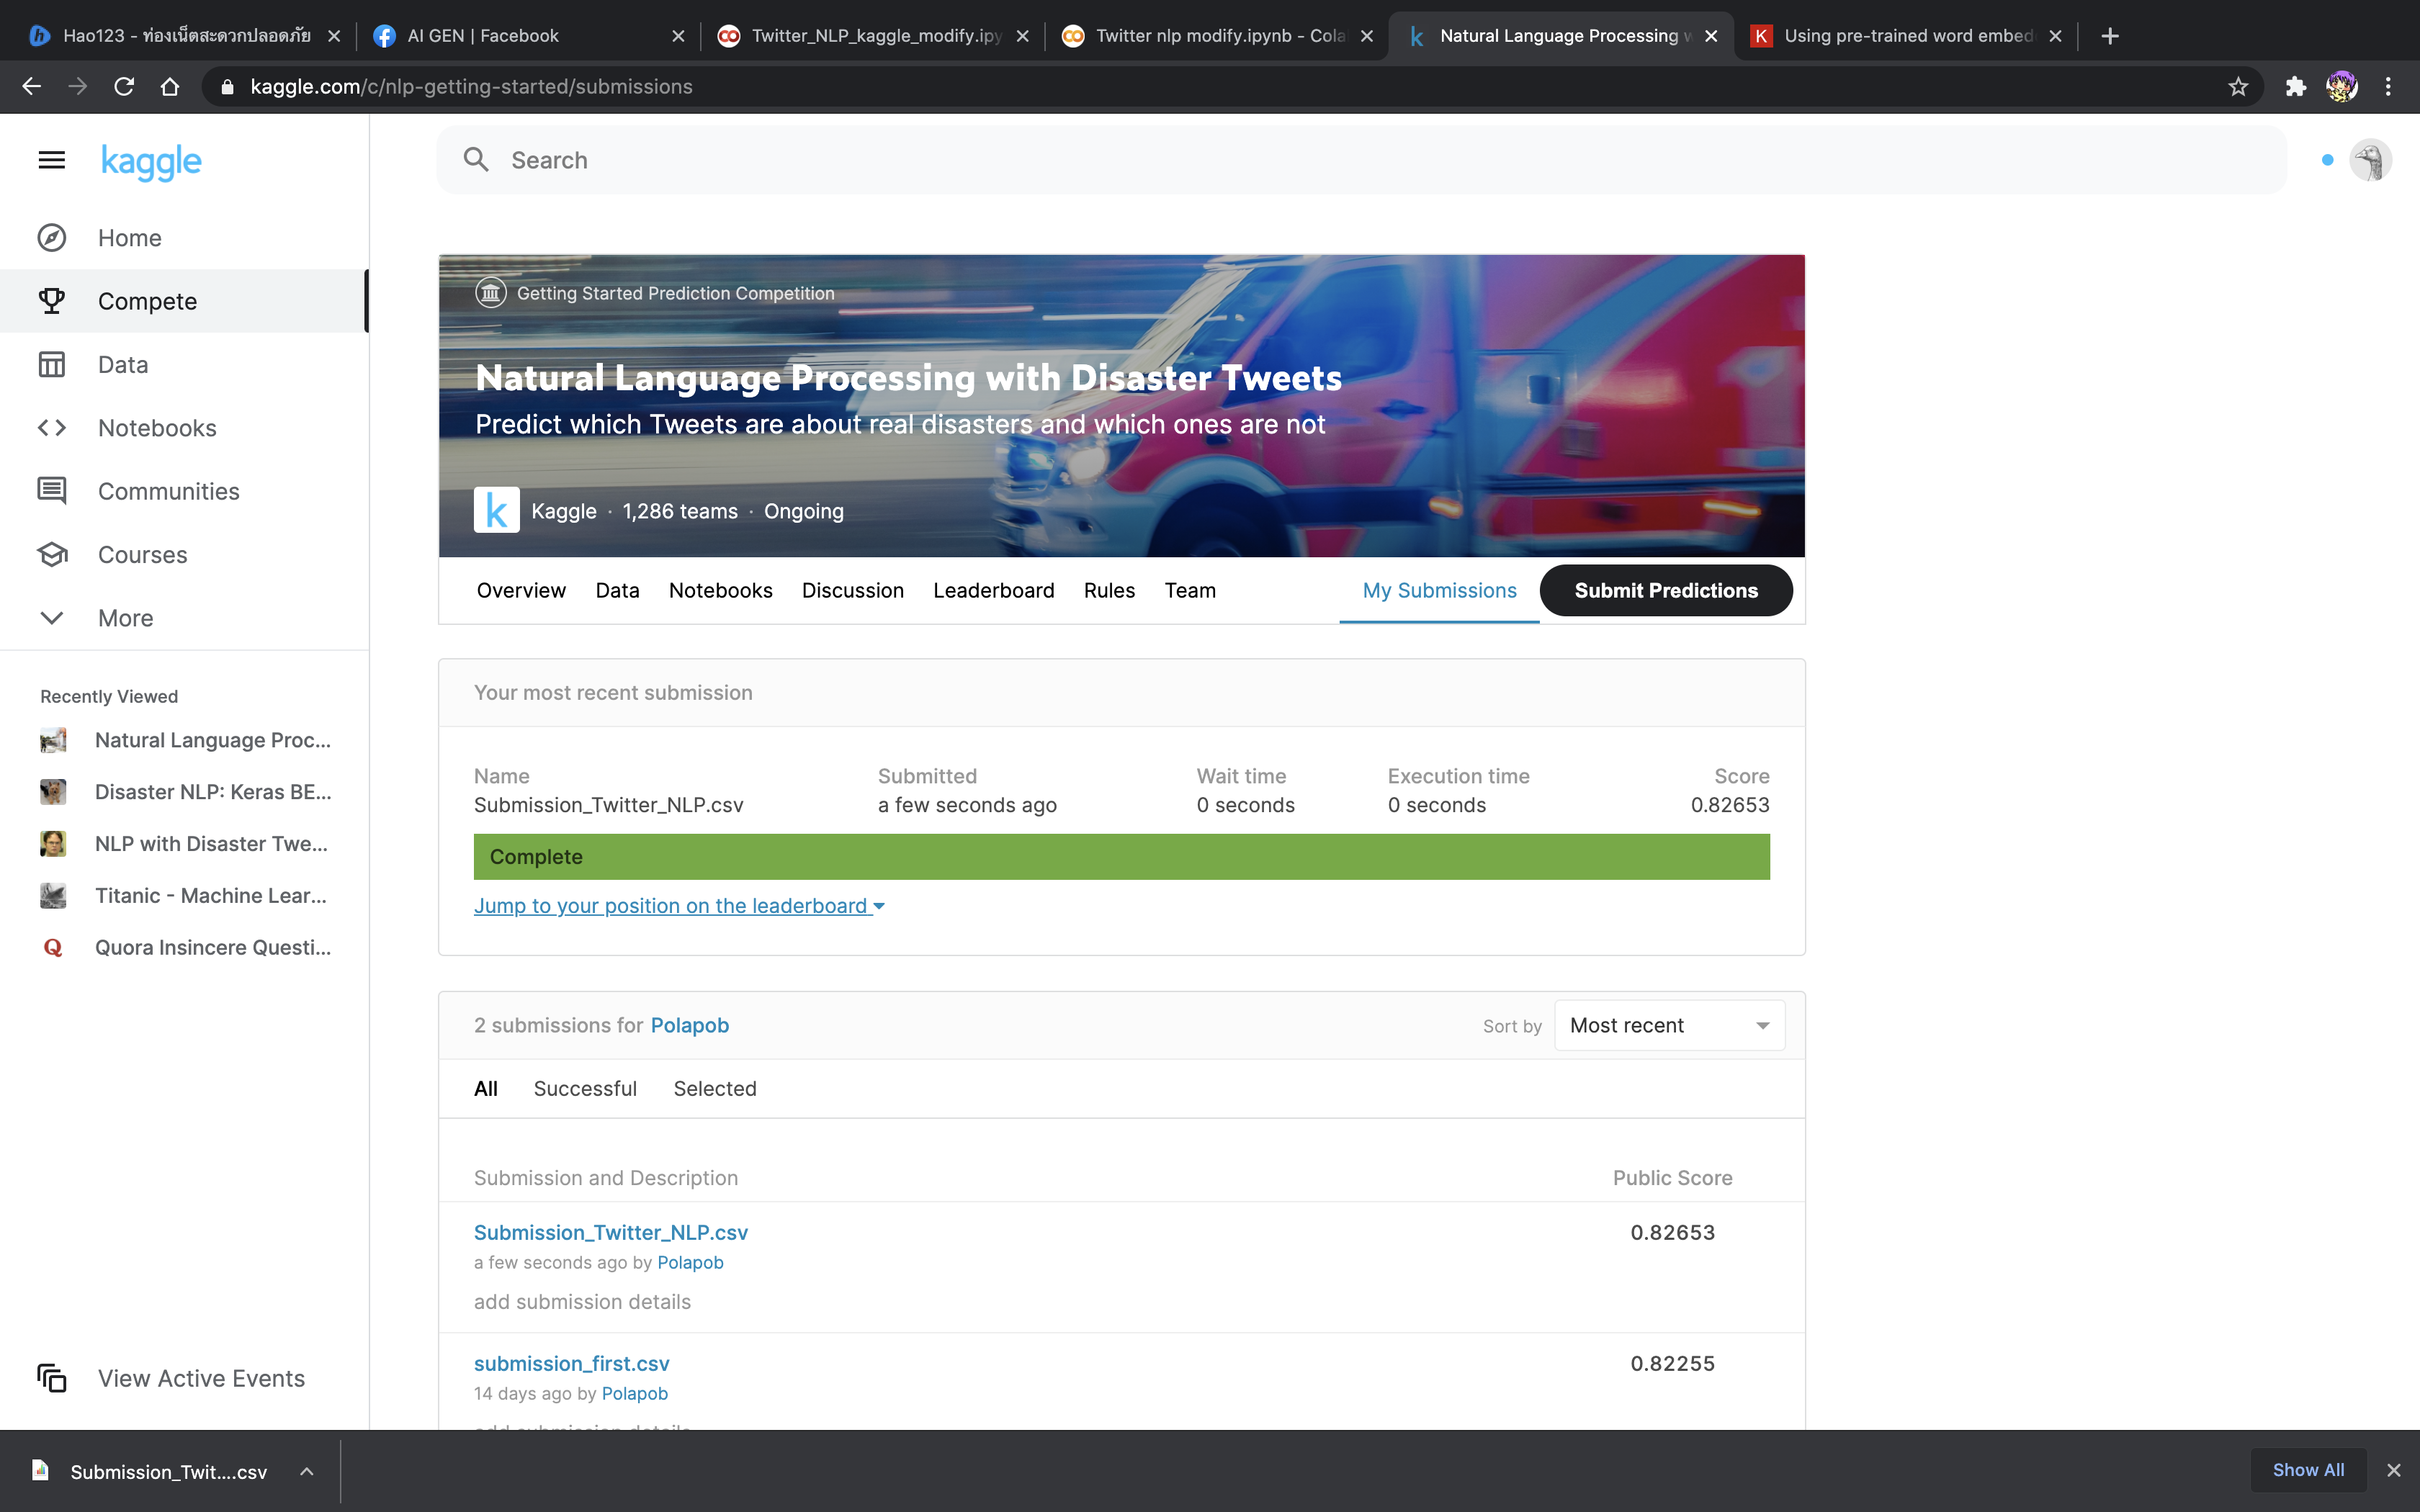